In [42]:
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [43]:
file_path = 'E:\Study\Degree\Sem 7\Deep Learning (01CT0722)\Project\dataset'

In [44]:
name_class = os.listdir(file_path)
name_class

['Cardiomegaly',
 'covid',
 'Lung_Opacity',
 'normal',
 'pneumonia',
 'Tuberculosis']

In [45]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [46]:
filepaths

['E:\\Study\\Degree\\Sem 7\\Deep Learning (01CT0722)\\Project\\dataset\\Cardiomegaly\\1.png',
 'E:\\Study\\Degree\\Sem 7\\Deep Learning (01CT0722)\\Project\\dataset\\Cardiomegaly\\10.png',
 'E:\\Study\\Degree\\Sem 7\\Deep Learning (01CT0722)\\Project\\dataset\\Cardiomegaly\\100.png',
 'E:\\Study\\Degree\\Sem 7\\Deep Learning (01CT0722)\\Project\\dataset\\Cardiomegaly\\1000.png',
 'E:\\Study\\Degree\\Sem 7\\Deep Learning (01CT0722)\\Project\\dataset\\Cardiomegaly\\1001.png',
 'E:\\Study\\Degree\\Sem 7\\Deep Learning (01CT0722)\\Project\\dataset\\Cardiomegaly\\1002.png',
 'E:\\Study\\Degree\\Sem 7\\Deep Learning (01CT0722)\\Project\\dataset\\Cardiomegaly\\1003.png',
 'E:\\Study\\Degree\\Sem 7\\Deep Learning (01CT0722)\\Project\\dataset\\Cardiomegaly\\1004.png',
 'E:\\Study\\Degree\\Sem 7\\Deep Learning (01CT0722)\\Project\\dataset\\Cardiomegaly\\1005.png',
 'E:\\Study\\Degree\\Sem 7\\Deep Learning (01CT0722)\\Project\\dataset\\Cardiomegaly\\1006.png',
 'E:\\Study\\Degree\\Sem 7\\Deep Lea

In [47]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly',
 'Cardiomegaly

In [48]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(6)

,Filepath,Label
0,E:\Study\Degree\Sem 7\Deep Learning (01CT0722)...,Cardiomegaly
1,E:\Study\Degree\Sem 7\Deep Learning (01CT0722)...,covid
2,E:\Study\Degree\Sem 7\Deep Learning (01CT0722)...,covid
3,E:\Study\Degree\Sem 7\Deep Learning (01CT0722)...,pneumonia
4,E:\Study\Degree\Sem 7\Deep Learning (01CT0722)...,Lung_Opacity
5,E:\Study\Degree\Sem 7\Deep Learning (01CT0722)...,pneumonia


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Lung_Opacity'),
  Text(1, 0, 'Cardiomegaly'),
  Text(2, 0, 'covid'),
  Text(3, 0, 'pneumonia'),
  Text(4, 0, 'normal'),
  Text(5, 0, 'Tuberculosis')])

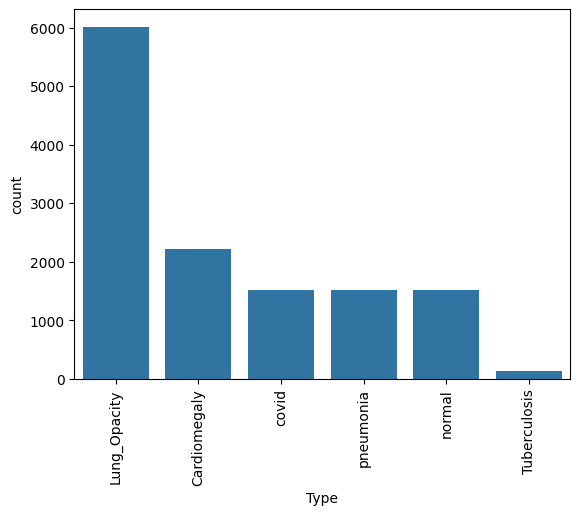

In [49]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [50]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

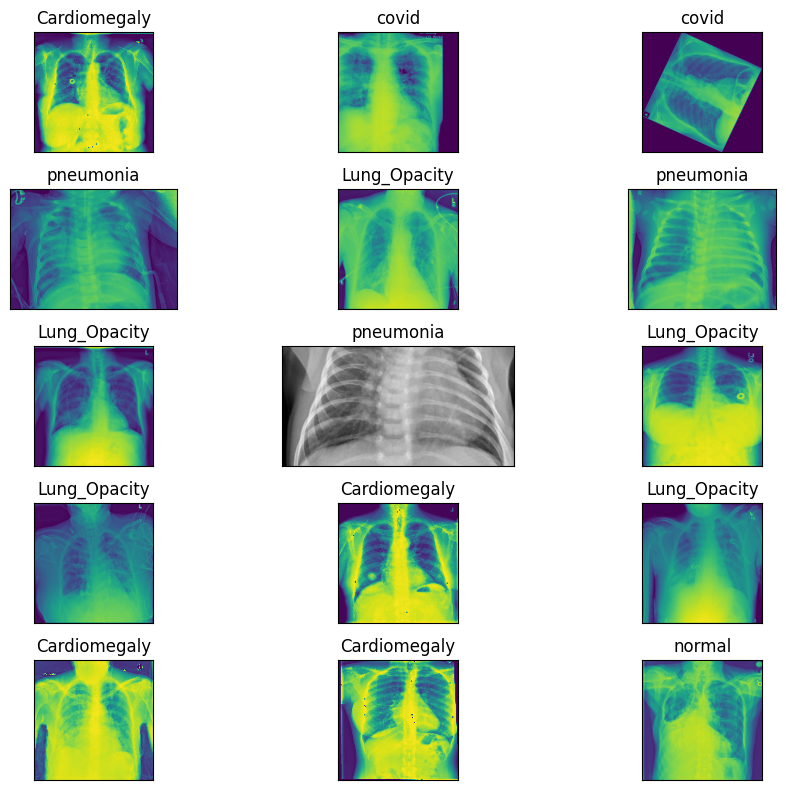

In [51]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(
    10, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [52]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input, validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [53]:
batch_size = 32
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    seed=42
)

Found 7767 validated image filenames belonging to 6 classes.
Found 647 validated image filenames belonging to 6 classes.
Found 3236 validated image filenames belonging to 6 classes.


In [54]:
pretrained_model = ResNet50(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

94765736/94765736 [==============================] - 18s 0us/step


In [55]:
inputs = pretrained_model.input
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)
outputs = Dense(len(train_gen.class_indices), activation='softmax')(
    x)  # Dynamic number of output units

model = Model(inputs=inputs, outputs=outputs)

In [56]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
# my_callbacks = [EarlyStopping(
#     monitor='val_accuracy',
#     min_delta=0,
#     patience=2,
#     mode='auto'
# )]

In [58]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=20,
    # callbacks=my_callbacks
)

Epoch 1/20
243/243 [==============================] - 372s 2s/step - loss: 0.3944 - accuracy: 0.8684 - val_loss: 0.2197 - val_accuracy: 0.9289
Epoch 2/20
243/243 [==============================] - 272s 1s/step - loss: 0.2278 - accuracy: 0.9162 - val_loss: 0.2126 - val_accuracy: 0.9304
Epoch 3/20
243/243 [==============================] - 238s 979ms/step - loss: 0.1680 - accuracy: 0.9427 - val_loss: 0.1944 - val_accuracy: 0.9366
Epoch 4/20
243/243 [==============================] - 292s 1s/step - loss: 0.1412 - accuracy: 0.9499 - val_loss: 0.2148 - val_accuracy: 0.9258
Epoch 5/20
243/243 [==============================] - 271s 1s/step - loss: 0.1217 - accuracy: 0.9583 - val_loss: 0.1943 - val_accuracy: 0.9382
Epoch 6/20
243/243 [==============================] - 267s 1s/step - loss: 0.1129 - accuracy: 0.9603 - val_loss: 0.1786 - val_accuracy: 0.9444
Epoch 7/20
243/243 [==============================] - 269s 1s/step - loss: 0.0993 - accuracy: 0.9641 - val_loss: 0.2120 - val_accuracy: 0.9

In [3]:
model.save("model_resnet50.h5")

NameError: name 'model' is not defined

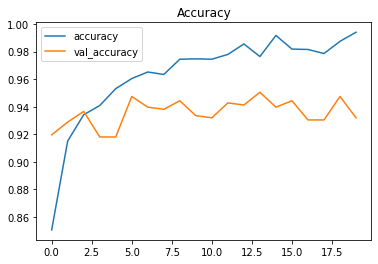

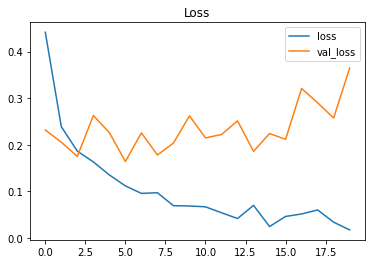

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Evaluate the model on the test set
test_results = model.evaluate(test_gen, verbose=0)
print("    Test Loss: {:.5f}".format(test_results[0]))
print("Test Accuracy: {:.2f}%".format(test_results[1] * 100))

    Test Loss: 0.46962
Test Accuracy: 91.44%


In [59]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred, axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred = [labels[k] for k in pred]

print("{}".format(pred))

 23/102 [=====>........................] - ETA: 1:41

: 

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

Cardiomegaly       0.17      0.18      0.17       583
Lung_Opacity       0.48      0.47      0.47      1528
Tuberculosis       0.00      0.00      0.00        34
       covid       0.15      0.13      0.14       368
      normal       0.11      0.11      0.11       360
   pneumonia       0.11      0.13      0.12       363

    accuracy                           0.29      3236
   macro avg       0.17      0.17      0.17      3236
weighted avg       0.30      0.29      0.30      3236



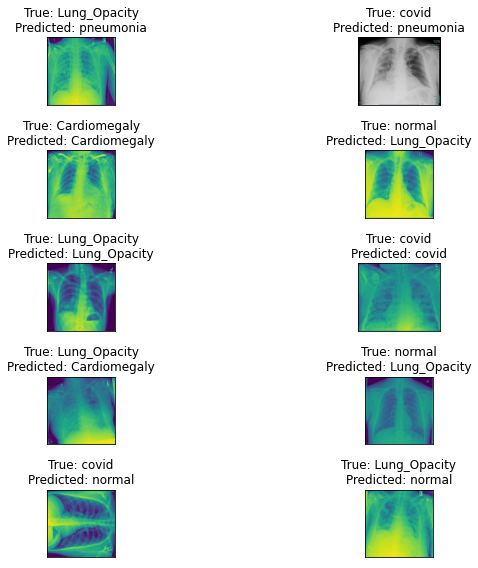

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = "00003923_015.png"

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

NameError: name 'model' is not defined